In [164]:
## sales data for time sereis prediction
### import data and libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os 

# exact data from zip file

In [165]:
import zipfile

In [166]:
# downlaod file path
url='https://www.kaggle.com/datasets/lazer999/used-cars/Pakwheels_car_data.csv'
file_path ="path\\archive.zip"
#file exract directory 
exract_directory= "path of exacted csv"

In [167]:
os.makedirs(exract_directory, exist_ok=True)

In [168]:
with zipfile.ZipFile(file_path , 'r') as zip_ref:

    zip_ref.extractall(exract_directory)


In [169]:
# Read the CSV file using pandas
df = pd.read_csv(r'PATH OF CSV')
df

,Unnamed: 0,Title,Model,Fuel,Engine,Transmission_type,Location,Price
0,0,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore
1,1,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore
2,2,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore
3,3,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore
4,4,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore
...,...,...,...,...,...,...,...,...
20817,20817,Toyota Land Cruiser 2017 ZX for Sale,2017,Petrol,4600 cc,Automatic,Lahore,PKR 3.6 crore
20818,20818,Honda City 2018 1.3 i-VTEC for Sale,2018,Petrol,1300 cc,Manual,Khanewal,PKR 25.25 lacs
20819,20819,Suzuki Swift 2022 GLX CVT for Sale,2022,Petrol,1200 cc,Automatic,Lahore,PKR 35 lacs
20820,20820,Nissan Dayz 2013 for Sale,2013,Petrol,660 cc,Automatic,Lahore,PKR 15.25 lacs


In [170]:
df.describe()

,Unnamed: 0,Model
count,20822.000000,20822.000000
mean,10410.500000,2014.343819
std,6010.937988,6.951746
min,0.000000,1982.000000
25%,5205.250000,2011.000000
50%,10410.500000,2016.000000
75%,15615.750000,2019.000000
max,20821.000000,2022.000000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20822 entries, 0 to 20821
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         20822 non-null  int64 
 1   Title              20822 non-null  object
 2   Model              20822 non-null  int64 
 3   Fuel               20822 non-null  object
 4   Engine             20822 non-null  object
 5   Transmission_type  20822 non-null  object
 6   Location           20822 non-null  object
 7   Price              20822 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


In [172]:
df.any().isna()

Unnamed: 0           False
Title                False
Model                False
Fuel                 False
Engine               False
Transmission_type    False
Location             False
Price                False
dtype: bool

In [173]:
df.columns

Index(['Unnamed: 0', 'Title', 'Model', 'Fuel', 'Engine', 'Transmission_type',
       'Location', 'Price'],
      dtype='object')

# data clensing

In [174]:
# set unnamed column as index and rename with id

In [175]:
df=df.rename(columns={'Unnamed: 0':'ID'})

In [176]:
df.set_index('ID', inplace=True)

In [177]:
df

,Title,Model,Fuel,Engine,Transmission_type,Location,Price
ID,,,,,,,
0,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore
1,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore
2,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore
3,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore
4,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore
...,...,...,...,...,...,...,...
20817,Toyota Land Cruiser 2017 ZX for Sale,2017,Petrol,4600 cc,Automatic,Lahore,PKR 3.6 crore
20818,Honda City 2018 1.3 i-VTEC for Sale,2018,Petrol,1300 cc,Manual,Khanewal,PKR 25.25 lacs
20819,Suzuki Swift 2022 GLX CVT for Sale,2022,Petrol,1200 cc,Automatic,Lahore,PKR 35 lacs


In [178]:
# to find 'for sale' cells 

In [179]:
## find last 2 words of title column
last_two_words = df['Title'].str.rsplit(n=2).str[-2:].str.join(' ')
word_counts_propotion = last_two_words.value_counts()*100/len(df)
print(word_counts_propotion)

for Sale                83.695130
for ...                  2.060321
VVTi fo...               1.435981
i-VTEC f...              1.042167
1.8 fo...                1.018154
Generation 20...         0.854865
1.8 ...                  0.835655
Exclusive for...         0.561906
Sensing for...           0.504274
1.6 Spe...               0.489866
Prosmatec 1...           0.451446
Leather Selection...     0.389012
TFSI for...              0.384209
WB for...                0.369801
Prosmatec 1....          0.283354
Black Leathe...          0.273749
Edition f...             0.273749
1.6 f...                 0.259341
2014 ActiveH...          0.240131
4MATIC fo...             0.240131
Plus Editio...           0.225723
1.6 fo...                0.225723
1.6 for...               0.216118
UG fo...                 0.211315
Avantgarde fo...         0.196907
Prime Selectio...        0.192105
Altis Autom...           0.192105
Exclusive fo...          0.172894
Limited Edition...       0.168091
Limited ...   

In [180]:
# by transformation - enriching 
# need to derive only car models as type in to new feild

In [181]:
import re

In [182]:
# exract type of vehicle from the title 
# split most left of the year
def extract_name_without_year(text):
# Split the text by space and check each part for a year
    parts = text.split()
    for part in parts:
        if part.isnumeric() and len(part) == 4:  
            return ' '.join(parts[:parts.index(part)])
    return text  

df['Type'] = df['Title'].apply(extract_name_without_year)
df


,Title,Model,Fuel,Engine,Transmission_type,Location,Price,Type
ID,,,,,,,,
0,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron
1,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron
2,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series
3,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron
4,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series
...,...,...,...,...,...,...,...,...
20817,Toyota Land Cruiser 2017 ZX for Sale,2017,Petrol,4600 cc,Automatic,Lahore,PKR 3.6 crore,Toyota Land Cruiser
20818,Honda City 2018 1.3 i-VTEC for Sale,2018,Petrol,1300 cc,Manual,Khanewal,PKR 25.25 lacs,Honda City
20819,Suzuki Swift 2022 GLX CVT for Sale,2022,Petrol,1200 cc,Automatic,Lahore,PKR 35 lacs,Suzuki Swift


In [183]:
# change the type of data columns 
df['Model'] = df['Model'].astype(str)
df['Type'] = df['Type'].astype(str)
# concatanate both columns 
df['Mode'] =  df['Type']+ ' '+df['Model'] 

df

,Title,Model,Fuel,Engine,Transmission_type,Location,Price,Type,Mode
ID,,,,,,,,,
0,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021
1,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021
2,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017
3,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021
4,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017
...,...,...,...,...,...,...,...,...,...
20817,Toyota Land Cruiser 2017 ZX for Sale,2017,Petrol,4600 cc,Automatic,Lahore,PKR 3.6 crore,Toyota Land Cruiser,Toyota Land Cruiser 2017
20818,Honda City 2018 1.3 i-VTEC for Sale,2018,Petrol,1300 cc,Manual,Khanewal,PKR 25.25 lacs,Honda City,Honda City 2018
20819,Suzuki Swift 2022 GLX CVT for Sale,2022,Petrol,1200 cc,Automatic,Lahore,PKR 35 lacs,Suzuki Swift,Suzuki Swift 2022


In [184]:
# catogarize by fuel
df['Fuel'].value_counts()

Petrol      18310
Hybrid       1228
Diesel       1115
Electric      120
CNG            49
Name: Fuel, dtype: int64

In [185]:
# view of the  df['Fuel'] == 'Electric'
selected_cells = df.loc[ df['Fuel'] == 'Electric' ]
selected_cells


,Title,Model,Fuel,Engine,Transmission_type,Location,Price,Type,Mode
ID,,,,,,,,,
0,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021
1,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021
3,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021
6,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021
10,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021
...,...,...,...,...,...,...,...,...,...
16435,Audi e-tron 2020 50 Quattro 230 kW for Sale,2020,Electric,60.0 kWh,Automatic,Lahore,PKR 1.65 crore,Audi e-tron,Audi e-tron 2020
16468,Audi e-tron 2020 50 Quattro 230 kW for Sale,2020,Electric,60.0 kWh,Automatic,Lahore,PKR 1.65 crore,Audi e-tron,Audi e-tron 2020
16502,Audi e-tron 2020 50 Quattro 230 kW for Sale,2020,Electric,60.0 kWh,Automatic,Lahore,PKR 1.65 crore,Audi e-tron,Audi e-tron 2020


In [186]:
# change the column format and also enrich the data by value
df[['value', 'denomination(PKR)']] = df['Price'].str.extract(r'([\d.]+)\s(\w+)')
df

,Title,Model,Fuel,Engine,Transmission_type,Location,Price,Type,Mode,value,denomination(PKR)
ID,,,,,,,,,,,
0,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore
1,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore
2,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017,2.32,crore
3,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore
4,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017,2.32,crore
...,...,...,...,...,...,...,...,...,...,...,...
20817,Toyota Land Cruiser 2017 ZX for Sale,2017,Petrol,4600 cc,Automatic,Lahore,PKR 3.6 crore,Toyota Land Cruiser,Toyota Land Cruiser 2017,3.6,crore
20818,Honda City 2018 1.3 i-VTEC for Sale,2018,Petrol,1300 cc,Manual,Khanewal,PKR 25.25 lacs,Honda City,Honda City 2018,25.25,lacs
20819,Suzuki Swift 2022 GLX CVT for Sale,2022,Petrol,1200 cc,Automatic,Lahore,PKR 35 lacs,Suzuki Swift,Suzuki Swift 2022,35,lacs


In [187]:
# to change them in to same currency 

In [188]:
df['value'] = df['value'].astype(float)

df['worth(lacs)'] = df['value'] * df['denomination(PKR)'].apply(lambda x: 100 if x == 'crore' else 1)

df

,Title,Model,Fuel,Engine,Transmission_type,Location,Price,Type,Mode,value,denomination(PKR),worth(lacs)
ID,,,,,,,,,,,,
0,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00
1,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00
2,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017,2.32,crore,232.00
3,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00
4,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017,2.32,crore,232.00
...,...,...,...,...,...,...,...,...,...,...,...,...
20817,Toyota Land Cruiser 2017 ZX for Sale,2017,Petrol,4600 cc,Automatic,Lahore,PKR 3.6 crore,Toyota Land Cruiser,Toyota Land Cruiser 2017,3.60,crore,360.00
20818,Honda City 2018 1.3 i-VTEC for Sale,2018,Petrol,1300 cc,Manual,Khanewal,PKR 25.25 lacs,Honda City,Honda City 2018,25.25,lacs,25.25
20819,Suzuki Swift 2022 GLX CVT for Sale,2022,Petrol,1200 cc,Automatic,Lahore,PKR 35 lacs,Suzuki Swift,Suzuki Swift 2022,35.00,lacs,35.00


In [189]:
# find duplicates 
df.duplicated()

ID
0        False
1         True
2        False
3         True
4         True
         ...  
20817     True
20818     True
20819     True
20820     True
20821    False
Length: 20822, dtype: bool

In [190]:
# make different values into separate columns 
df['kWh'] = df['Engine'].str.extract(r'(\d+\.\d+)\s+kWh', expand=False)
df['cc'] = df['Engine'].str.extract(r'(\d+)\s+cc', expand=False)
df

,Title,Model,Fuel,Engine,Transmission_type,Location,Price,Type,Mode,value,denomination(PKR),worth(lacs),kWh,cc
ID,,,,,,,,,,,,,,
0,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00,95.0,NaN
1,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00,95.0,NaN
2,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017,2.32,crore,232.00,NaN,3500
3,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00,95.0,NaN
4,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017,2.32,crore,232.00,NaN,3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20817,Toyota Land Cruiser 2017 ZX for Sale,2017,Petrol,4600 cc,Automatic,Lahore,PKR 3.6 crore,Toyota Land Cruiser,Toyota Land Cruiser 2017,3.60,crore,360.00,NaN,4600
20818,Honda City 2018 1.3 i-VTEC for Sale,2018,Petrol,1300 cc,Manual,Khanewal,PKR 25.25 lacs,Honda City,Honda City 2018,25.25,lacs,25.25,NaN,1300
20819,Suzuki Swift 2022 GLX CVT for Sale,2022,Petrol,1200 cc,Automatic,Lahore,PKR 35 lacs,Suzuki Swift,Suzuki Swift 2022,35.00,lacs,35.00,NaN,1200


In [191]:
# null value presentage 
df.isna().mean()

Title                0.000000
Model                0.000000
Fuel                 0.000000
Engine               0.000000
Transmission_type    0.000000
Location             0.000000
Price                0.000000
Type                 0.000000
Mode                 0.000000
value                0.047018
denomination(PKR)    0.047018
worth(lacs)          0.047018
kWh                  0.977140
cc                   0.022860
dtype: float64

In [192]:
# test random deletion (MCAR), missing at random (MAR), and missing not at random (MNAR)

In [193]:
# change data types 
df[['kWh', 'cc']] = df[['kWh', 'cc']].replace( np.nan,0)
df['Fuel']=df['Fuel'].astype(str)
df['Model']=df['Model'].astype(int)
df['Transmission_type']=df['Transmission_type'].astype(str)
df['Location']=df['Location'].astype(str)
df['Mode']=df['Mode'].astype(str)
df['worth(lacs)']=df['worth(lacs)'].astype(float)
df['kWh']=df['kWh'].astype(float)
df['cc']=df['cc'].astype(float)
df

,Title,Model,Fuel,Engine,Transmission_type,Location,Price,Type,Mode,value,denomination(PKR),worth(lacs),kWh,cc
ID,,,,,,,,,,,,,,
0,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00,95.0,0.0
1,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00,95.0,0.0
2,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017,2.32,crore,232.00,0.0,3500.0
3,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00,95.0,0.0
4,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017,2.32,crore,232.00,0.0,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20817,Toyota Land Cruiser 2017 ZX for Sale,2017,Petrol,4600 cc,Automatic,Lahore,PKR 3.6 crore,Toyota Land Cruiser,Toyota Land Cruiser 2017,3.60,crore,360.00,0.0,4600.0
20818,Honda City 2018 1.3 i-VTEC for Sale,2018,Petrol,1300 cc,Manual,Khanewal,PKR 25.25 lacs,Honda City,Honda City 2018,25.25,lacs,25.25,0.0,1300.0
20819,Suzuki Swift 2022 GLX CVT for Sale,2022,Petrol,1200 cc,Automatic,Lahore,PKR 35 lacs,Suzuki Swift,Suzuki Swift 2022,35.00,lacs,35.00,0.0,1200.0


In [194]:
# Introduce missing values at random (MCAR)
missing_indices = np.random.choice(df.index, size=2, replace=False)
df.loc[missing_indices, 'worth(lacs)'] = np.nan
missing_indices

array([11202,  5924], dtype=int64)

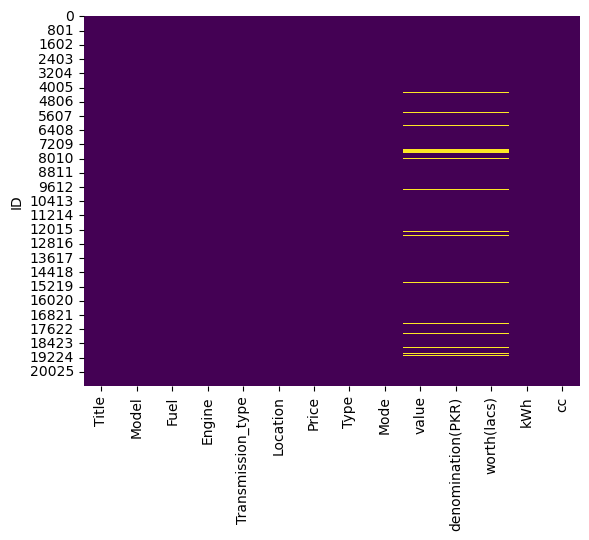

In [195]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.show()

In [196]:
# remove duplicates 
# but do not remove duplicates because there are different cars for sale, then they are perticular items .

In [197]:
#df.drop_duplicates(inplace=True)
df

,Title,Model,Fuel,Engine,Transmission_type,Location,Price,Type,Mode,value,denomination(PKR),worth(lacs),kWh,cc
ID,,,,,,,,,,,,,,
0,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00,95.0,0.0
1,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00,95.0,0.0
2,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017,2.32,crore,232.00,0.0,3500.0
3,Audi e-tron 2021 for Sale,2021,Electric,95.0 kWh,Automatic,Lahore,PKR 2.65 crore,Audi e-tron,Audi e-tron 2021,2.65,crore,265.00,95.0,0.0
4,Lexus RX Series 2017 450H for Sale,2017,Petrol,3500 cc,Automatic,Lahore,PKR 2.32 crore,Lexus RX Series,Lexus RX Series 2017,2.32,crore,232.00,0.0,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20817,Toyota Land Cruiser 2017 ZX for Sale,2017,Petrol,4600 cc,Automatic,Lahore,PKR 3.6 crore,Toyota Land Cruiser,Toyota Land Cruiser 2017,3.60,crore,360.00,0.0,4600.0
20818,Honda City 2018 1.3 i-VTEC for Sale,2018,Petrol,1300 cc,Manual,Khanewal,PKR 25.25 lacs,Honda City,Honda City 2018,25.25,lacs,25.25,0.0,1300.0
20819,Suzuki Swift 2022 GLX CVT for Sale,2022,Petrol,1200 cc,Automatic,Lahore,PKR 35 lacs,Suzuki Swift,Suzuki Swift 2022,35.00,lacs,35.00,0.0,1200.0


In [198]:
# delete the unwanted columns 
df.drop(['Title','Engine','Price','value','denomination(PKR)'], axis=1, inplace=True)
df

,Model,Fuel,Transmission_type,Location,Type,Mode,worth(lacs),kWh,cc
ID,,,,,,,,,
0,2021,Electric,Automatic,Lahore,Audi e-tron,Audi e-tron 2021,265.00,95.0,0.0
1,2021,Electric,Automatic,Lahore,Audi e-tron,Audi e-tron 2021,265.00,95.0,0.0
2,2017,Petrol,Automatic,Lahore,Lexus RX Series,Lexus RX Series 2017,232.00,0.0,3500.0
3,2021,Electric,Automatic,Lahore,Audi e-tron,Audi e-tron 2021,265.00,95.0,0.0
4,2017,Petrol,Automatic,Lahore,Lexus RX Series,Lexus RX Series 2017,232.00,0.0,3500.0
...,...,...,...,...,...,...,...,...,...
20817,2017,Petrol,Automatic,Lahore,Toyota Land Cruiser,Toyota Land Cruiser 2017,360.00,0.0,4600.0
20818,2018,Petrol,Manual,Khanewal,Honda City,Honda City 2018,25.25,0.0,1300.0
20819,2022,Petrol,Automatic,Lahore,Suzuki Swift,Suzuki Swift 2022,35.00,0.0,1200.0


In [199]:
# sort value by year 
df.sort_values(by='Model', ascending=True,inplace=True)
df

,Model,Fuel,Transmission_type,Location,Type,Mode,worth(lacs),kWh,cc
ID,,,,,,,,,
2030,1982,Petrol,Manual,Wah cantt,Mazda,Mazda 1982,2.90,0.0,1000.0
5026,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
5000,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
4975,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
4951,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
...,...,...,...,...,...,...,...,...,...
15796,2022,Petrol,Automatic,Rawalpindi,Honda Civic,Honda Civic 2022,60.50,0.0,1500.0
19208,2022,Petrol,Automatic,Lahore,BAIC BJ40 Plus,BAIC BJ40 Plus 2022,83.25,0.0,2000.0
1697,2022,Petrol,Automatic,Islamabad,Toyota Corolla,Toyota Corolla 2022,47.00,0.0,1600.0


In [200]:
# drop missing data  
df.dropna(inplace=True)
df

,Model,Fuel,Transmission_type,Location,Type,Mode,worth(lacs),kWh,cc
ID,,,,,,,,,
2030,1982,Petrol,Manual,Wah cantt,Mazda,Mazda 1982,2.90,0.0,1000.0
5026,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
5000,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
4975,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
4951,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
...,...,...,...,...,...,...,...,...,...
15796,2022,Petrol,Automatic,Rawalpindi,Honda Civic,Honda Civic 2022,60.50,0.0,1500.0
19208,2022,Petrol,Automatic,Lahore,BAIC BJ40 Plus,BAIC BJ40 Plus 2022,83.25,0.0,2000.0
1697,2022,Petrol,Automatic,Islamabad,Toyota Corolla,Toyota Corolla 2022,47.00,0.0,1600.0


In [201]:
from scipy.stats import zscore

In [202]:
# find outlires and remove them
cols_to_check = ['worth(lacs)']
z_scores = zscore(df[cols_to_check])

# Set threshold for outliers (e.g., z-score greater than 3)
threshold = 3

# Find outliers
outliers = (z_scores >= threshold).any(axis=1)

# Display outliers
print("Rows with outliers:")
print(df[outliers])
df=df[~outliers]
df

Rows with outliers:
      Model    Fuel Transmission_type   Location                 Type  \
ID                                                                      
1419   2015  Petrol         Automatic     Lahore  Toyota Land Cruiser   
4995   2015  Petrol         Automatic     Lahore  Toyota Land Cruiser   
1396   2015  Petrol         Automatic     Lahore  Toyota Land Cruiser   
1198   2015  Petrol         Automatic     Lahore  Toyota Land Cruiser   
4860   2015  Petrol         Automatic     Lahore  Toyota Land Cruiser   
...     ...     ...               ...        ...                  ...   
3500   2019  Petrol         Automatic  Islamabad  Toyota Land Cruiser   
3598   2019  Petrol         Automatic  Islamabad  Toyota Land Cruiser   
3572   2019  Petrol         Automatic  Islamabad  Toyota Land Cruiser   
3913   2019  Petrol         Automatic  Islamabad  Toyota Land Cruiser   
3775   2019  Petrol         Automatic  Islamabad  Toyota Land Cruiser   

                          Mode

,Model,Fuel,Transmission_type,Location,Type,Mode,worth(lacs),kWh,cc
ID,,,,,,,,,
2030,1982,Petrol,Manual,Wah cantt,Mazda,Mazda 1982,2.90,0.0,1000.0
5026,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
5000,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
4975,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
4951,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0
...,...,...,...,...,...,...,...,...,...
15796,2022,Petrol,Automatic,Rawalpindi,Honda Civic,Honda Civic 2022,60.50,0.0,1500.0
19208,2022,Petrol,Automatic,Lahore,BAIC BJ40 Plus,BAIC BJ40 Plus 2022,83.25,0.0,2000.0
1697,2022,Petrol,Automatic,Islamabad,Toyota Corolla,Toyota Corolla 2022,47.00,0.0,1600.0


In [203]:
df['Transmission_type'].value_counts()

Automatic    14911
Manual        4412
Name: Transmission_type, dtype: int64

In [204]:
# add dummy variables to fuel

df.loc[:, 'Automatic'] = 0
df.loc[:, 'Manual'] = 0

df.loc[df['Transmission_type'] == 'Automatic', 'Automatic'] = 1
df.loc[df['Transmission_type'] == 'Manual', 'Manual'] = 1
df

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Model,Fuel,Transmission_type,Location,Type,Mode,worth(lacs),kWh,cc,Automatic,Manual
ID,,,,,,,,,,,
2030,1982,Petrol,Manual,Wah cantt,Mazda,Mazda 1982,2.90,0.0,1000.0,0,1
5026,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1
5000,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1
4975,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1
4951,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
15796,2022,Petrol,Automatic,Rawalpindi,Honda Civic,Honda Civic 2022,60.50,0.0,1500.0,1,0
19208,2022,Petrol,Automatic,Lahore,BAIC BJ40 Plus,BAIC BJ40 Plus 2022,83.25,0.0,2000.0,1,0
1697,2022,Petrol,Automatic,Islamabad,Toyota Corolla,Toyota Corolla 2022,47.00,0.0,1600.0,1,0


In [205]:
df['Fuel'].value_counts()

Petrol      16977
Hybrid       1169
Diesel       1008
Electric      120
CNG            49
Name: Fuel, dtype: int64

In [206]:
df.loc[:, 'Petrol'] = 0
df.loc[:, 'Hybrid'] = 0
df.loc[:, 'Diesel'] = 0
df.loc[:, 'Electric'] = 0
df.loc[:, 'CNG'] = 0
df.loc[df['Fuel'] == 'Petrol', 'Petrol'] = 1
df.loc[df['Fuel'] == 'Hybrid', 'Hybrid'] = 1
df.loc[df['Fuel'] == 'Diesel', 'Diesel'] = 1
df.loc[df['Fuel'] == 'Electric', 'Electric'] = 1
df.loc[df['Fuel'] == 'CNG', 'CNG'] = 1

df

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Model,Fuel,Transmission_type,Location,Type,Mode,worth(lacs),kWh,cc,Automatic,Manual,Petrol,Hybrid,Diesel,Electric,CNG
ID,,,,,,,,,,,,,,,,
2030,1982,Petrol,Manual,Wah cantt,Mazda,Mazda 1982,2.90,0.0,1000.0,0,1,1,0,0,0,0
5026,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1,0,0,0,0,1
5000,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1,0,0,0,0,1
4975,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1,0,0,0,0,1
4951,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15796,2022,Petrol,Automatic,Rawalpindi,Honda Civic,Honda Civic 2022,60.50,0.0,1500.0,1,0,1,0,0,0,0
19208,2022,Petrol,Automatic,Lahore,BAIC BJ40 Plus,BAIC BJ40 Plus 2022,83.25,0.0,2000.0,1,0,1,0,0,0,0
1697,2022,Petrol,Automatic,Islamabad,Toyota Corolla,Toyota Corolla 2022,47.00,0.0,1600.0,1,0,1,0,0,0,0


In [254]:
df



,Model,Fuel,Transmission_type,Location,Type,Mode,worth(lacs),kWh,cc,Automatic,Manual,Petrol,Hybrid,Diesel,Electric,CNG
ID,,,,,,,,,,,,,,,,
2030,1982,Petrol,Manual,Wah cantt,Mazda,Mazda 1982,2.90,0.0,1000.0,0,1,1,0,0,0,0
5026,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1,0,0,0,0,1
5000,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1,0,0,0,0,1
4975,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1,0,0,0,0,1
4951,1982,CNG,Manual,Islamabad,Datsun 120 Y,Datsun 120 Y 1982,2.35,0.0,1000.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15796,2022,Petrol,Automatic,Rawalpindi,Honda Civic,Honda Civic 2022,60.50,0.0,1500.0,1,0,1,0,0,0,0
19208,2022,Petrol,Automatic,Lahore,BAIC BJ40 Plus,BAIC BJ40 Plus 2022,83.25,0.0,2000.0,1,0,1,0,0,0,0
1697,2022,Petrol,Automatic,Islamabad,Toyota Corolla,Toyota Corolla 2022,47.00,0.0,1600.0,1,0,1,0,0,0,0


# plot the graphs 

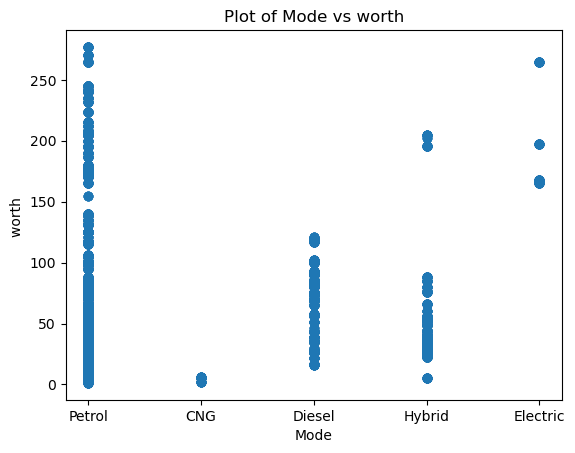

In [207]:
plt.scatter(df['Fuel'], df['worth(lacs)'])

plt.xlabel('Mode')
plt.ylabel('worth ')
plt.title('Plot of Mode vs worth')

plt.show()

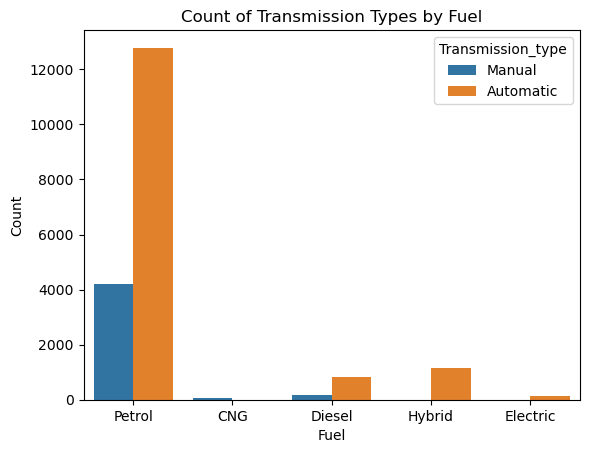

In [208]:
sns.countplot(data=df, x='Fuel', hue='Transmission_type')
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.title('Count of Transmission Types by Fuel')
plt.show()

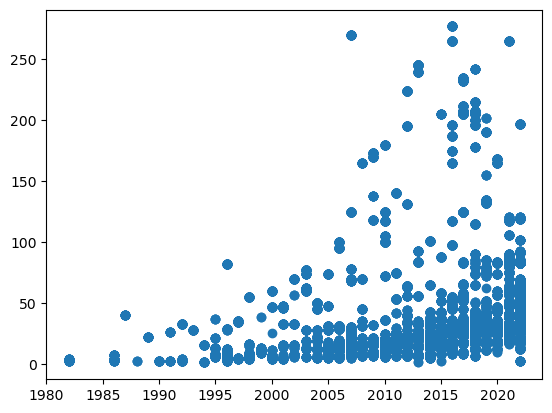

In [209]:
plt.scatter(df['Model'],df['worth(lacs)'])

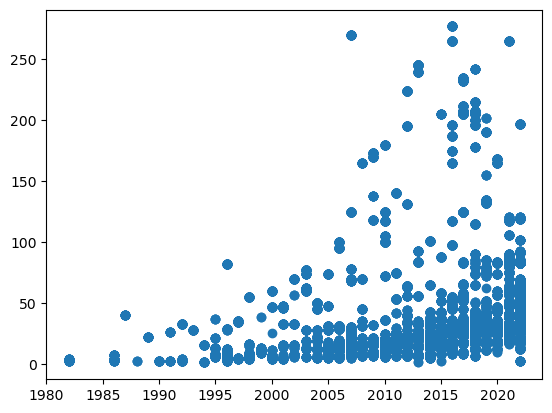

In [210]:
plt.scatter(df['Model'],df['worth(lacs)'])

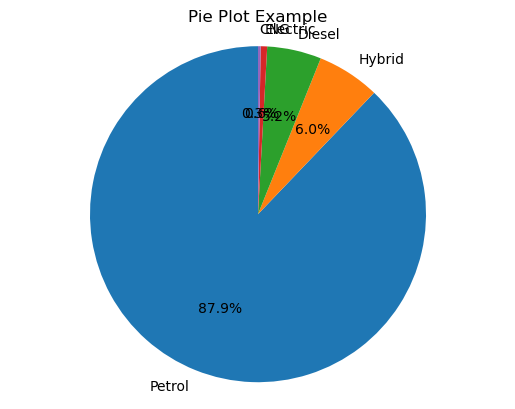

In [211]:
counts = df['Fuel'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  

plt.title('Pie Plot Example')

plt.show()

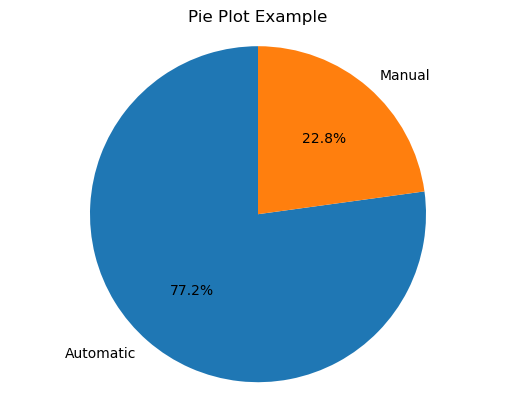

In [212]:
counts = df['Transmission_type'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  

plt.title('Pie Plot Example')

plt.show()

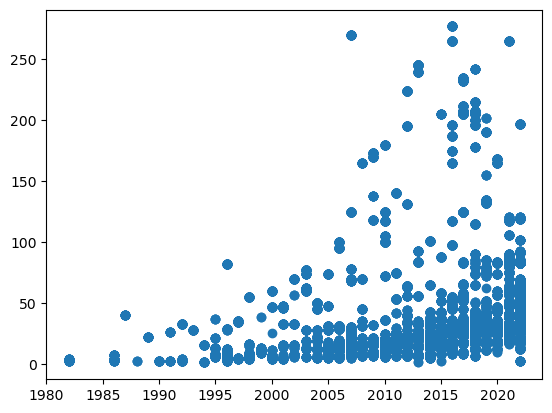

In [213]:
plt.scatter(df['Model'],df['worth(lacs)'])

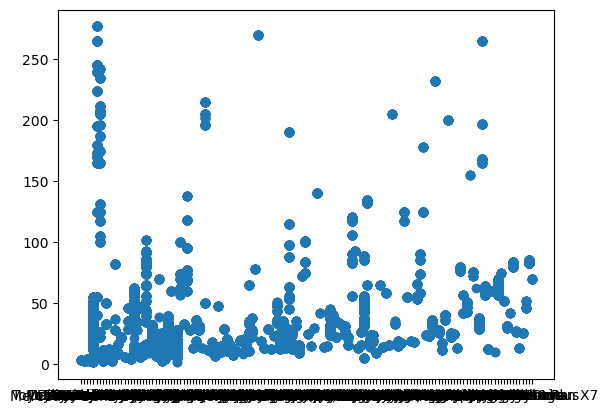

In [214]:
plt.scatter(df['Type'], df['worth(lacs)'])

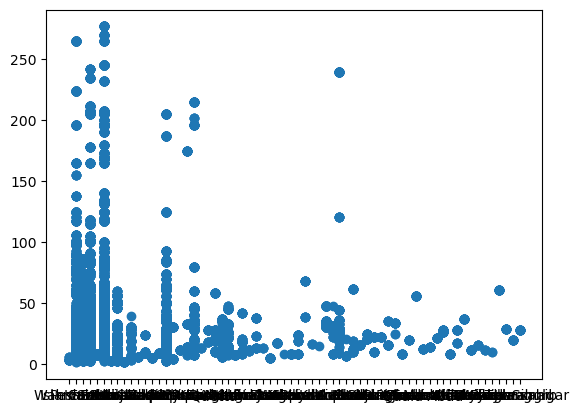

In [215]:
plt.scatter(df['Location'], df['worth(lacs)'])

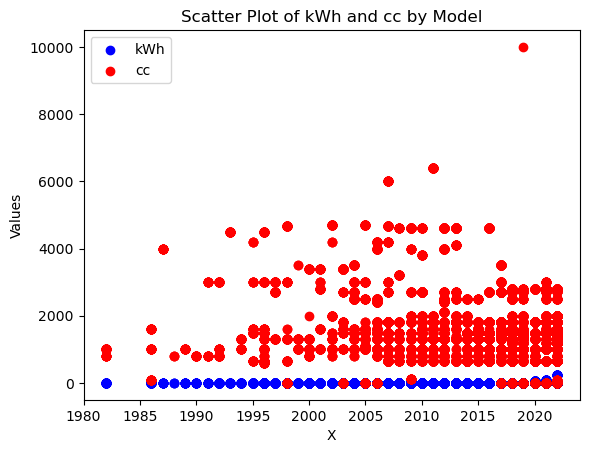

In [216]:
# Plotting
plt.scatter(df['Model'], df['kWh'], color='blue', label='kWh')
plt.scatter(df['Model'], df['cc'], color='red', label='cc')

plt.xlabel('X')
plt.ylabel('Values')
plt.title('Scatter Plot of kWh and cc by Model')

plt.legend()

plt.show()

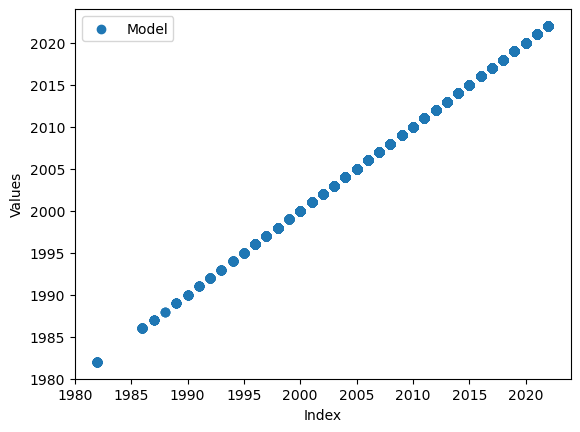

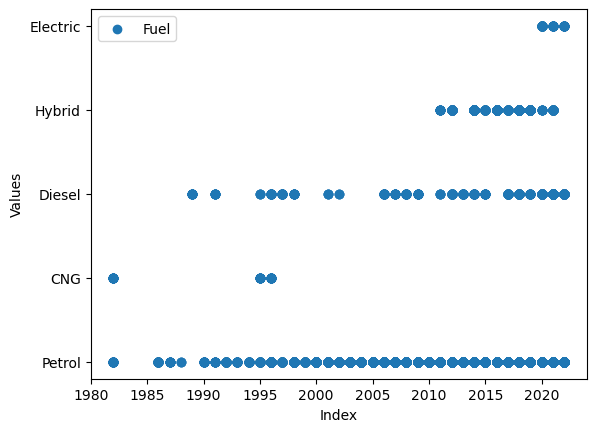

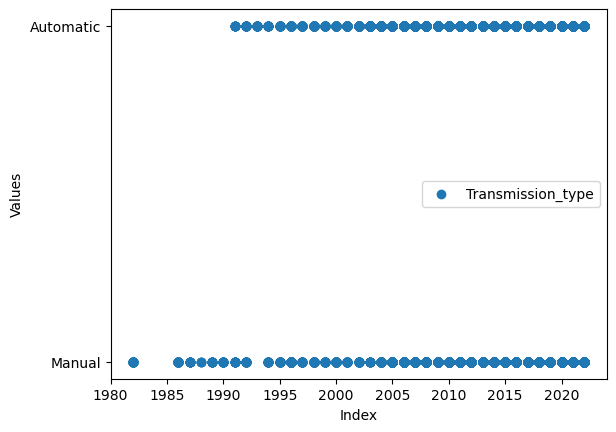

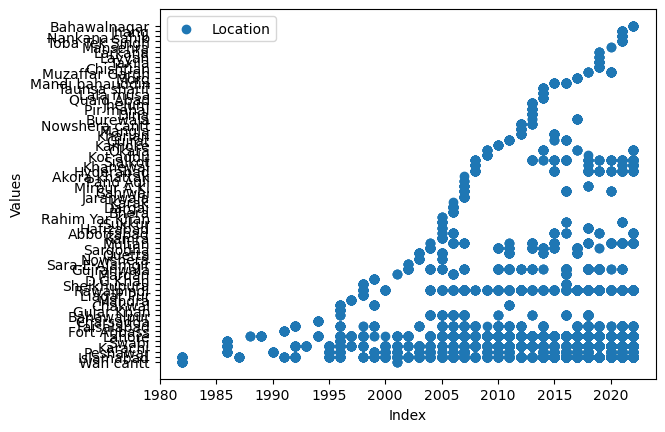

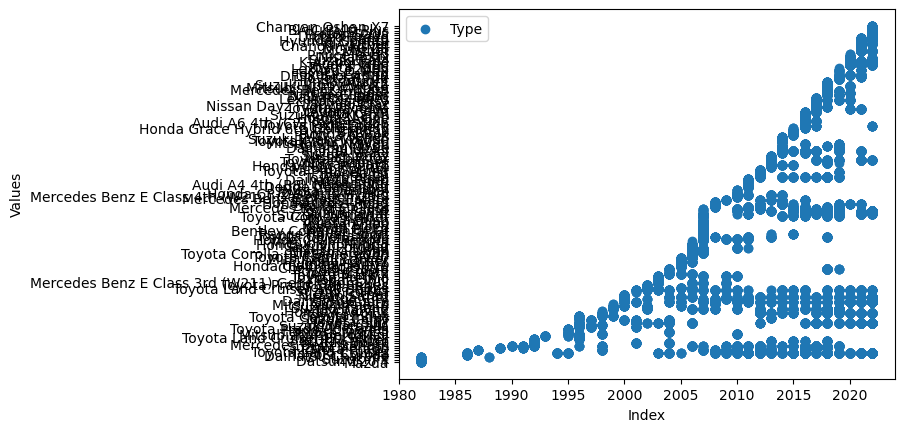

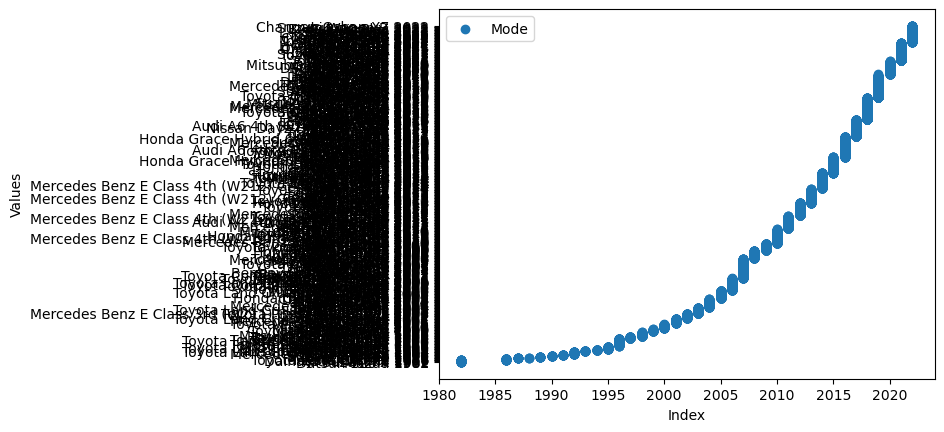

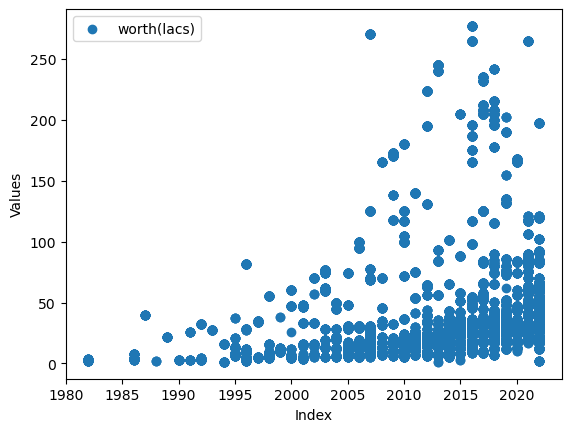

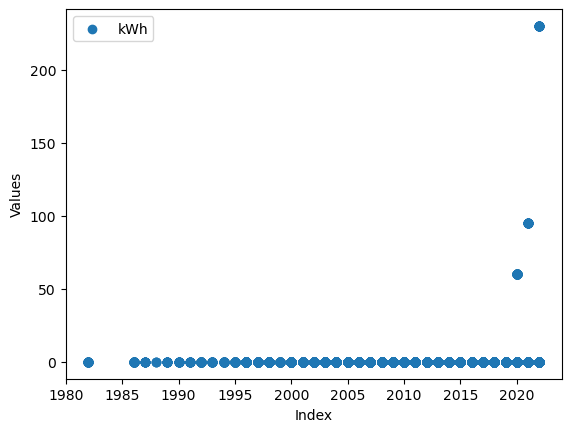

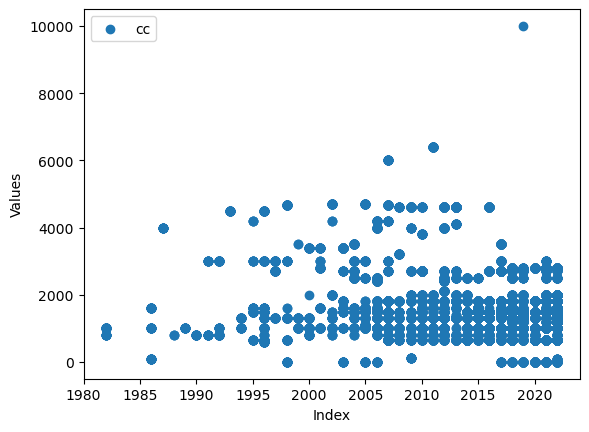

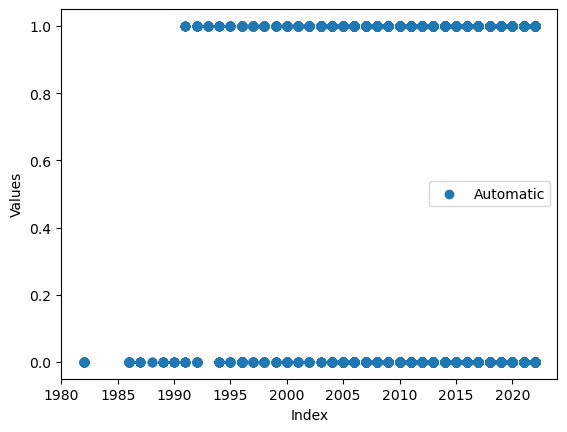

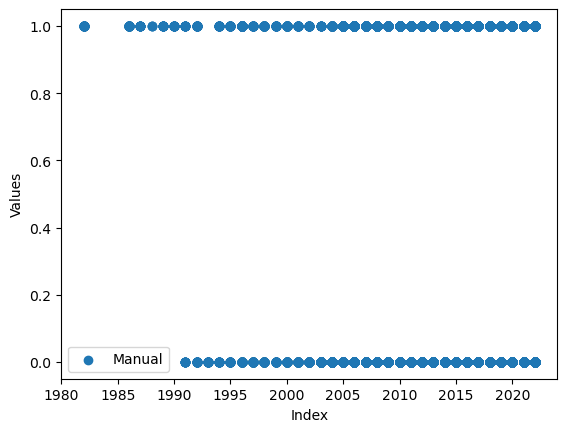

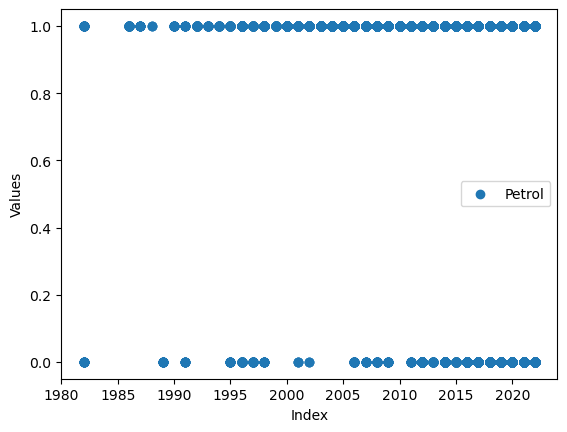

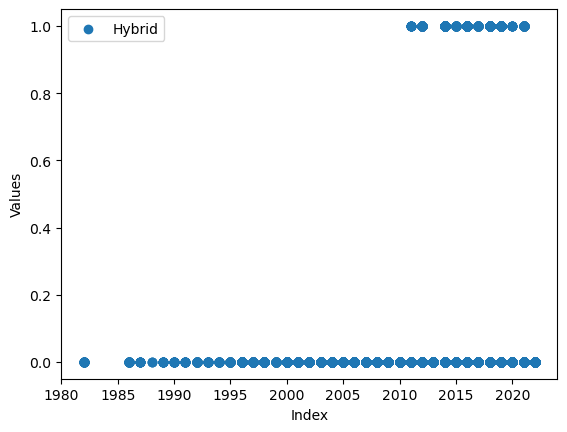

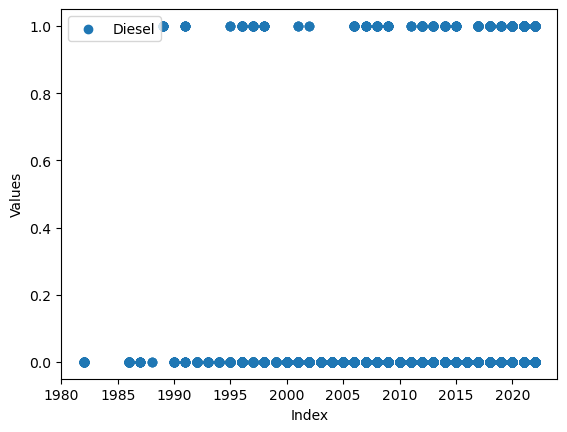

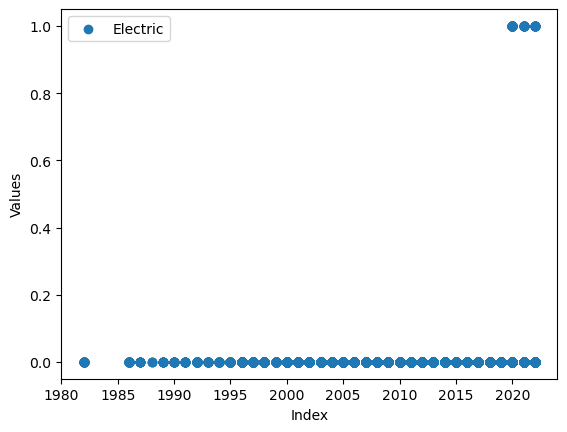

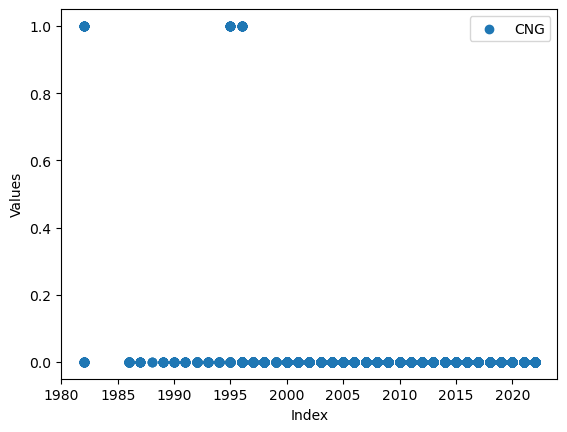

In [217]:
df.columns = df.columns.astype(str)
for col in df.columns:
    plt.scatter(df['Model'], df[col], label=col)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

<Axes: >

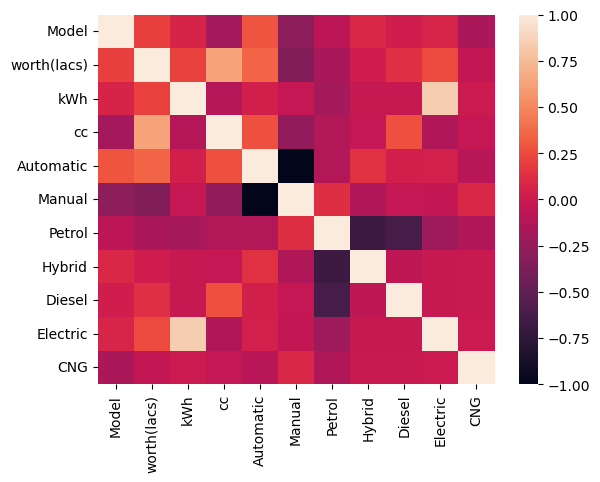

In [218]:
sns.heatmap(df.corr())

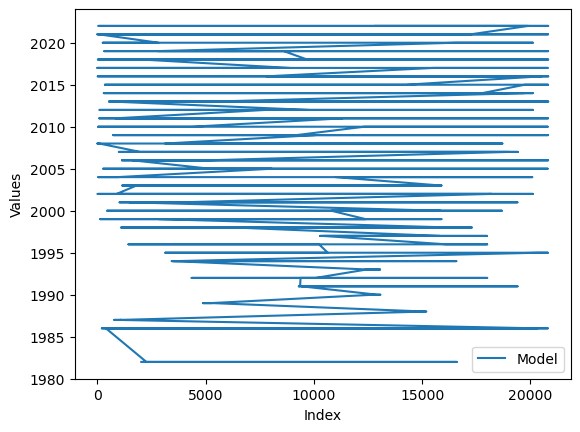

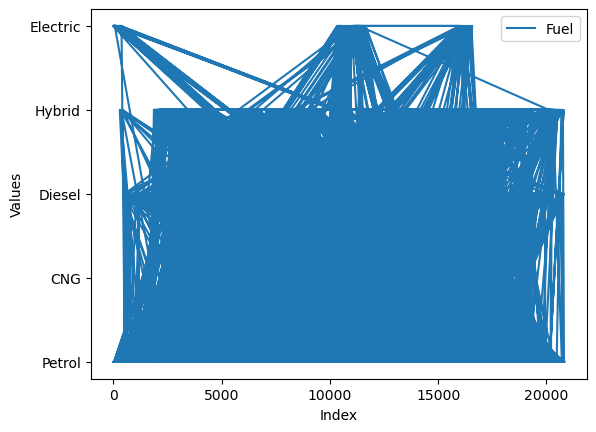

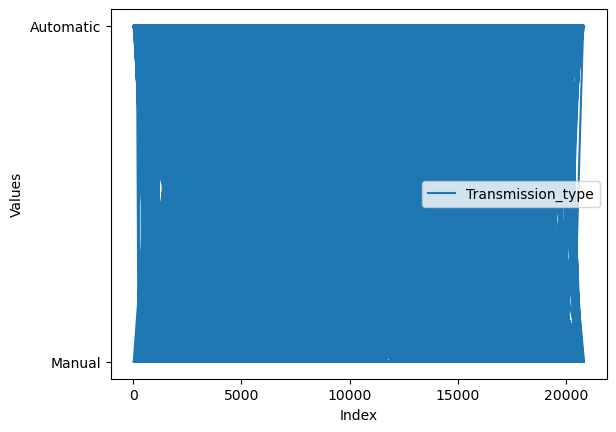

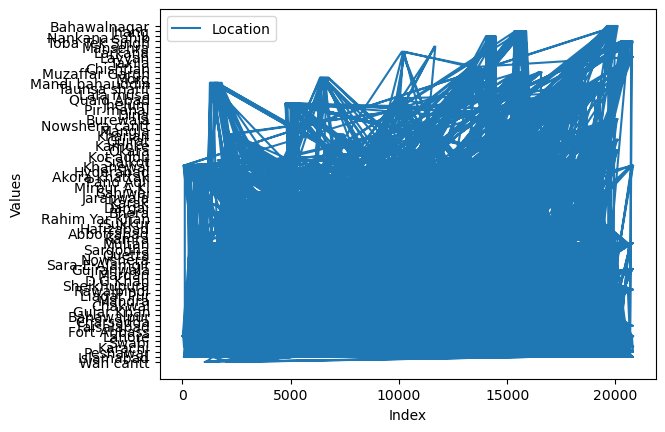

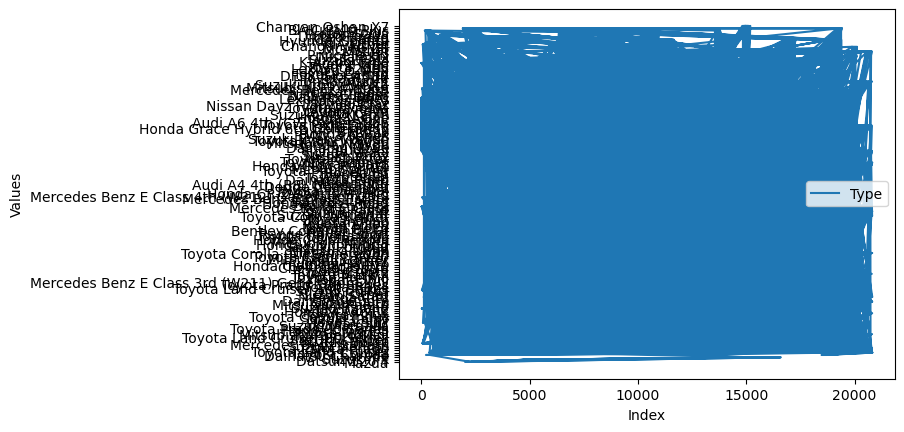

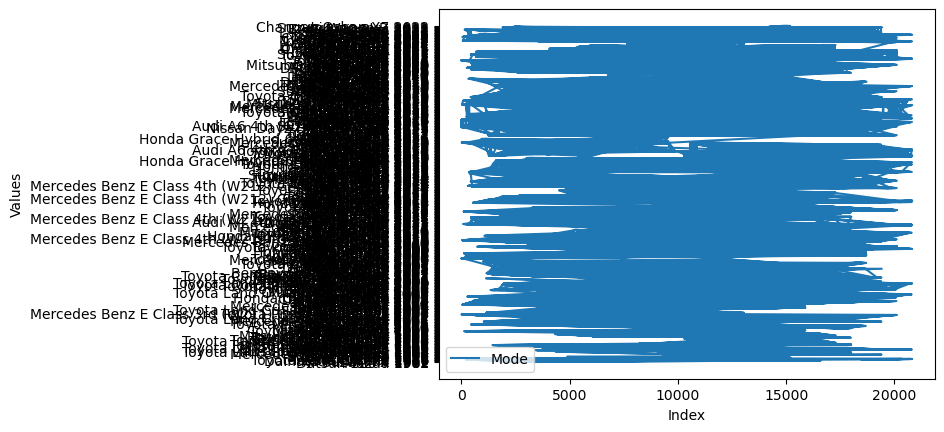

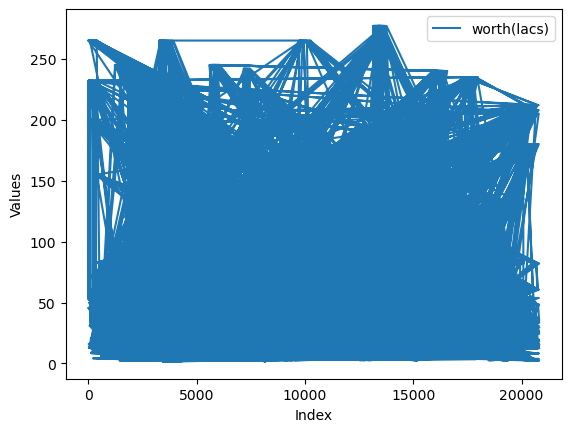

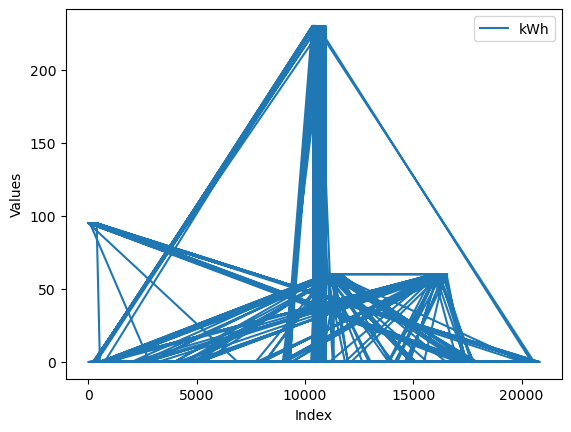

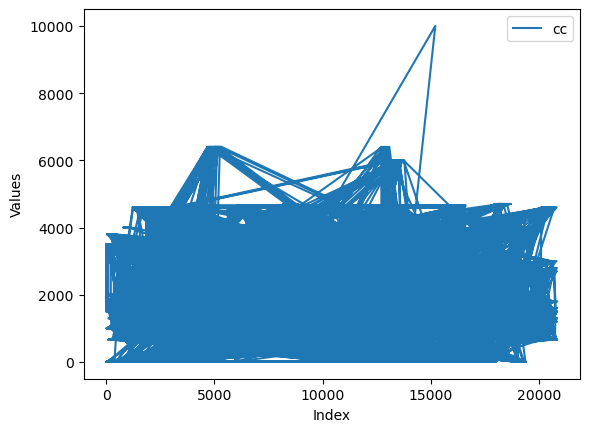

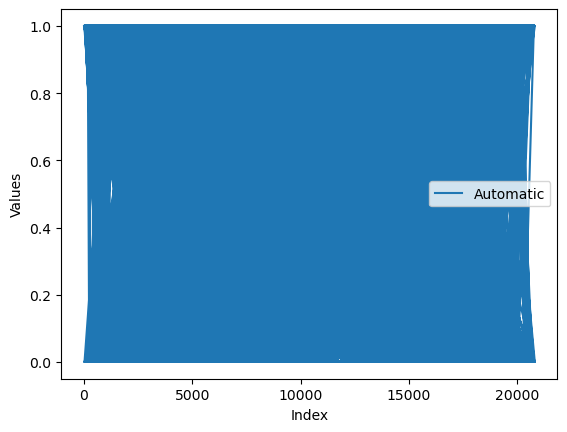

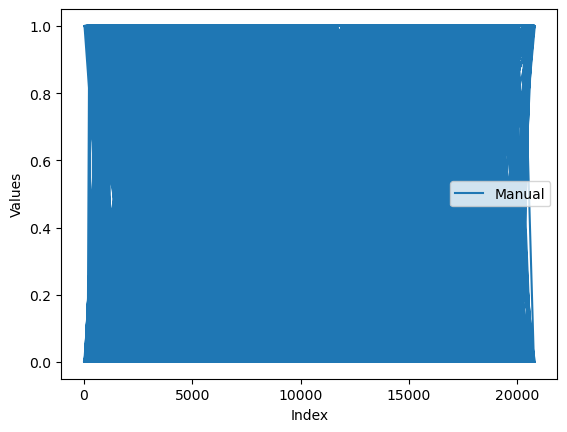

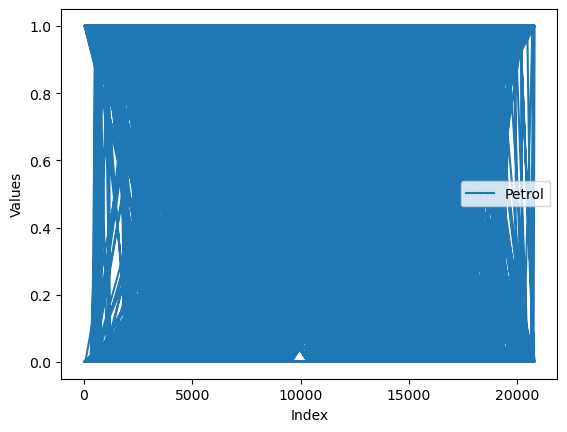

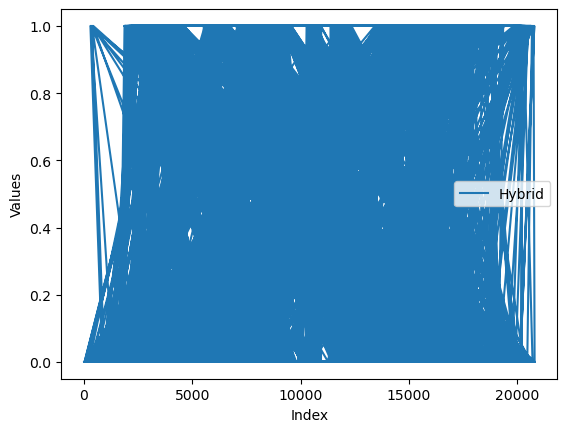

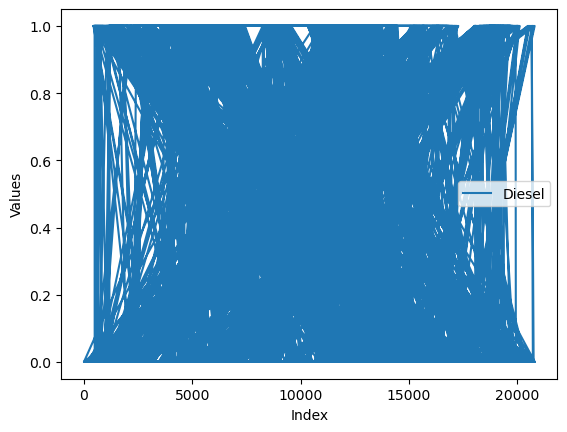

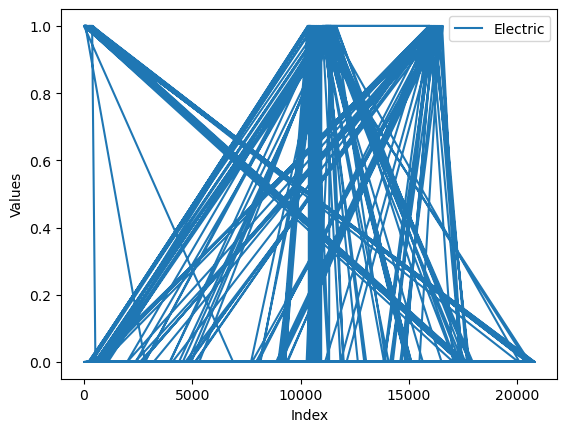

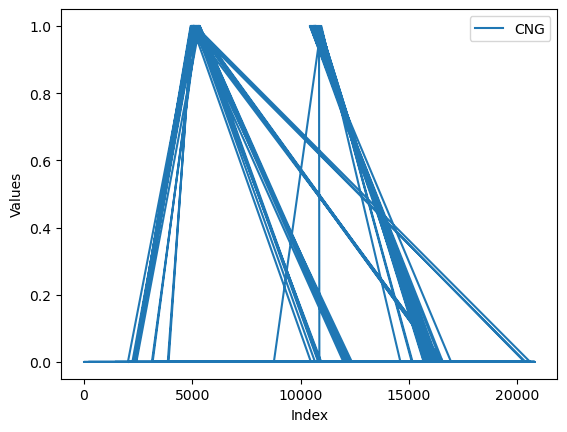

In [219]:
df.columns = df.columns.astype(str)
for col in df.columns:
    plt.plot(df.index, df[col], label=col)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19323 entries, 2030 to 12830
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              19323 non-null  int32  
 1   Fuel               19323 non-null  object 
 2   Transmission_type  19323 non-null  object 
 3   Location           19323 non-null  object 
 4   Type               19323 non-null  object 
 5   Mode               19323 non-null  object 
 6   worth(lacs)        19323 non-null  float64
 7   kWh                19323 non-null  float64
 8   cc                 19323 non-null  float64
 9   Automatic          19323 non-null  int64  
 10  Manual             19323 non-null  int64  
 11  Petrol             19323 non-null  int64  
 12  Hybrid             19323 non-null  int64  
 13  Diesel             19323 non-null  int64  
 14  Electric           19323 non-null  int64  
 15  CNG                19323 non-null  int64  
dtypes: float64(3), int3

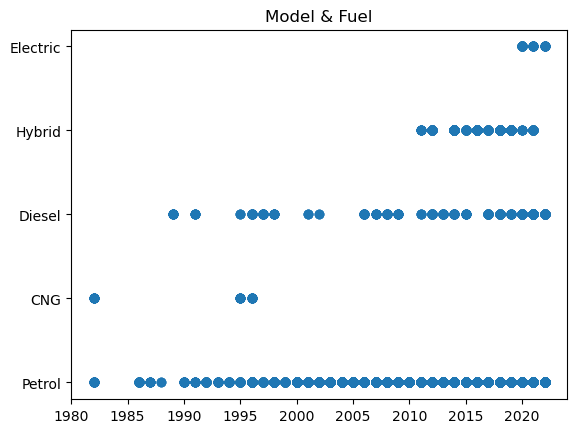

In [221]:
plt.subplot()
plt.title("Model & Fuel")
plt.scatter(df["Model"], df["Fuel"])

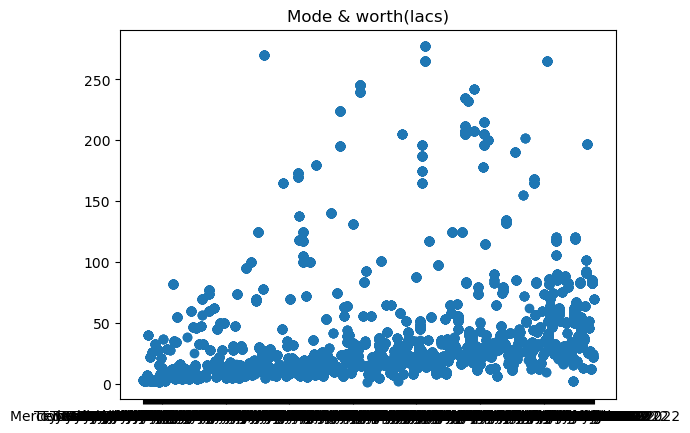

In [222]:
plt.subplot()
plt.title("Mode & worth(lacs)")
plt.scatter(df["Mode"], df["worth(lacs)"])

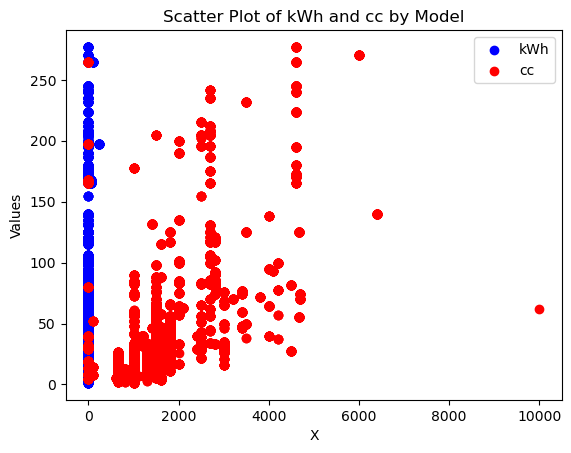

In [223]:
plt.scatter(df['kWh'],df['worth(lacs)'],  color='blue', label='kWh')
plt.scatter( df['cc'],df['worth(lacs)'], color='red', label='cc')

plt.xlabel('X')
plt.ylabel('Values')
plt.title('Scatter Plot of kWh and cc by Model')

plt.legend()

plt.show()

# Data analysing part 

In [224]:
from scipy import stats

In [225]:
# check transmission type means simmilarity 
categories = df['Transmission_type'].unique() 
data = {category: df[df['Transmission_type'] == category]['worth(lacs)'] for category in categories}

f_statistic, p_value = stats.f_oneway(*data.values())

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

if p_value < 0.05:
    print("The ANOVA test result is statistically significant, indicating differences among Transmission_type means.")
else:
    print("The ANOVA test result is not statistically significant, indicating no significant differences among Transmission_type means.")


F-Statistic: 2668.944624580399
P-Value: 0.0
The ANOVA test result is statistically significant, indicating differences among Transmission_type means.


In [226]:
from scipy.stats import pearsonr

In [227]:
# check the year and price relationship
correlation, p_value = pearsonr(df['Model'], df['worth(lacs)'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

# Define significance level (alpha)
alpha = 0.05

# Perform hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship both Year and price.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship both Year and price.")

Correlation coefficient: 0.19664007116883392
P-value: 1.037862120036874e-167
Reject the null hypothesis. There is a significant relationship both Year and price.


# data modeling 

In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19323 entries, 2030 to 12830
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              19323 non-null  int32  
 1   Fuel               19323 non-null  object 
 2   Transmission_type  19323 non-null  object 
 3   Location           19323 non-null  object 
 4   Type               19323 non-null  object 
 5   Mode               19323 non-null  object 
 6   worth(lacs)        19323 non-null  float64
 7   kWh                19323 non-null  float64
 8   cc                 19323 non-null  float64
 9   Automatic          19323 non-null  int64  
 10  Manual             19323 non-null  int64  
 11  Petrol             19323 non-null  int64  
 12  Hybrid             19323 non-null  int64  
 13  Diesel             19323 non-null  int64  
 14  Electric           19323 non-null  int64  
 15  CNG                19323 non-null  int64  
dtypes: float64(3), int3

In [230]:
X = df[['Model' ,'kWh','cc','Automatic','Manual','Petrol','Hybrid','Diesel','Electric','CNG']]  # Features
   
y = df['worth(lacs)']  # Target variable

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [232]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [233]:
y_pred = model.predict(X_test)
X_test,y_test,y_pred

(       Model  kWh      cc  Automatic  Manual  Petrol  Hybrid  Diesel  \
 ID                                                                     
 2845    2014  0.0  2000.0          1       0       1       0       0   
 19741   2009  0.0   800.0          1       0       1       0       0   
 11967   2019  0.0  1000.0          1       0       1       0       0   
 13215   2018  0.0  1800.0          1       0       1       0       0   
 12577   2018  0.0  1600.0          1       0       1       0       0   
 ...      ...  ...     ...        ...     ...     ...     ...     ...   
 8884    2011  0.0   800.0          0       1       1       0       0   
 19949   2005  0.0  1600.0          0       1       1       0       0   
 6722    2019  0.0  1600.0          1       0       1       0       0   
 13102   2019  0.0  1000.0          1       0       1       0       0   
 9428    2015  0.0  1000.0          1       0       1       0       0   
 
        Electric  CNG  
 ID                    
 

In [234]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 948.4228025351368


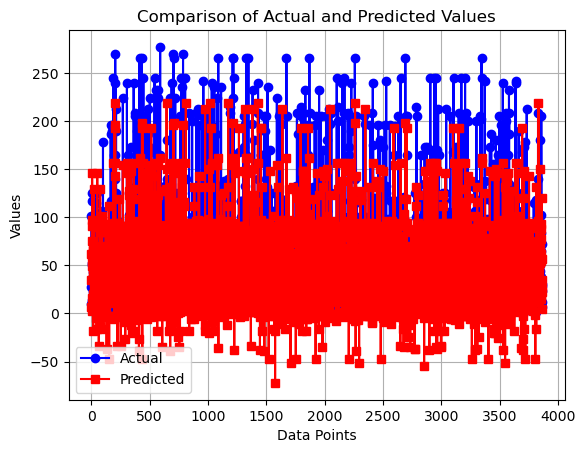

In [235]:
plt.plot(y_test.values, label='Actual', marker='o', color='blue')  
plt.plot(y_pred, label='Predicted', marker='s', color='red')  

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend() 

plt.grid(True) 
plt.show()

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pl

In [237]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [238]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 948.4228025351368


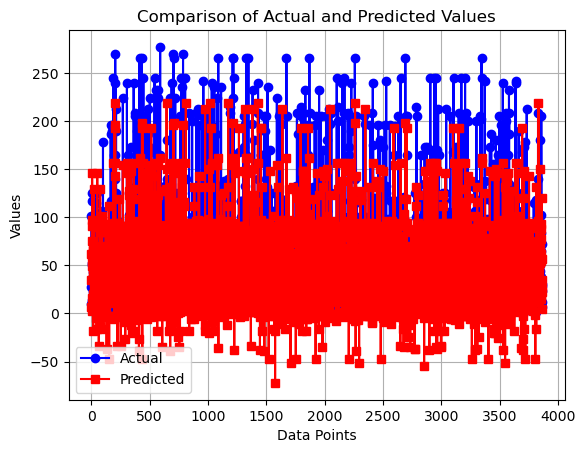

In [239]:
plt.plot(y_test.values, label='Actual', marker='o', color='blue')  
plt.plot(y_pred, label='Predicted', marker='s', color='red')  

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()  

plt.grid(True) 
plt.show()

In [240]:
from sklearn.ensemble import RandomForestRegressor

In [241]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [242]:
y_pred = model.predict(X_test)

In [243]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 172.60446449584674


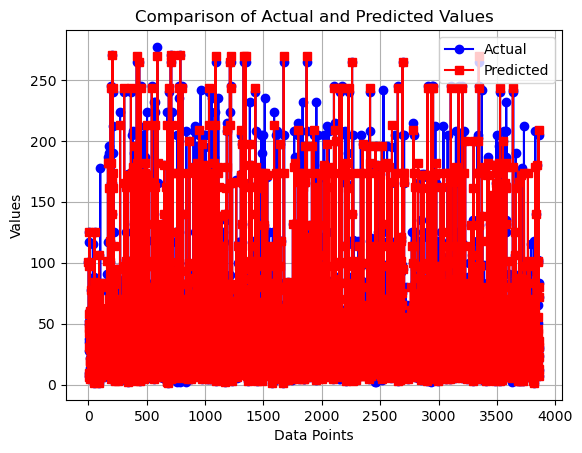

In [244]:
plt.plot(y_test.values, label='Actual', marker='o', color='blue')  
plt.plot(y_pred, label='Predicted', marker='s', color='red') 

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()  

plt.grid(True)  
plt.show()

In [245]:
from sklearn.svm import SVR

In [246]:
model = SVR(kernel='rbf')  # Radial basis function (RBF) kernel
model.fit(X_train, y_train)

SVR()

In [247]:
y_pred = model.predict(X_test)

In [248]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1356.7600335654638


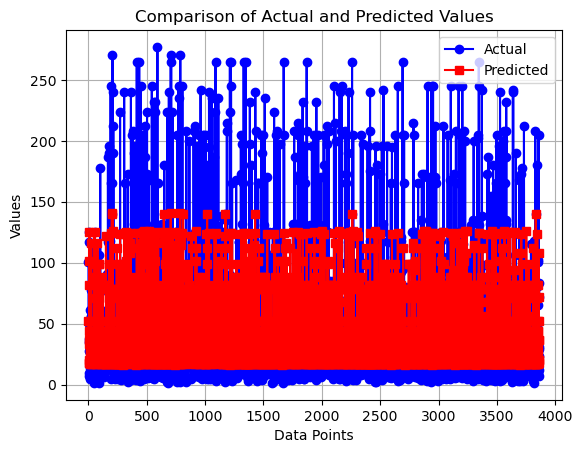

In [249]:
plt.plot(y_test.values, label='Actual', marker='o', color='blue')  
plt.plot(y_pred, label='Predicted', marker='s', color='red')  

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend() 

plt.grid(True) 
plt.show()

In [250]:
from sklearn.ensemble import GradientBoostingRegressor

In [251]:
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)





GradientBoostingRegressor(random_state=42)

In [252]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 297.1279804745829


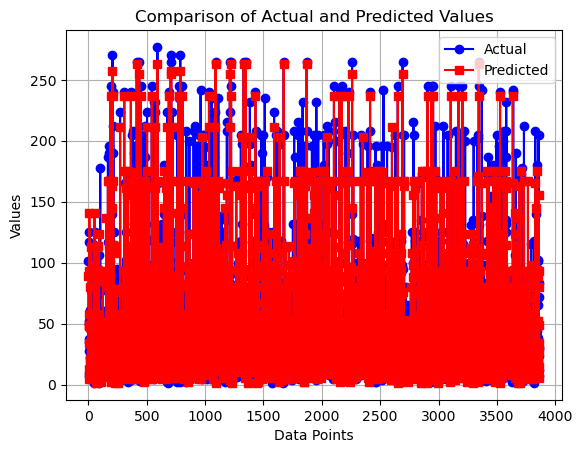

In [253]:

plt.plot(y_test.values, label='Actual', marker='o', color='blue')  
plt.plot(y_pred, label='Predicted', marker='s', color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend() 
plt.grid(True) 
plt.show()

### least mse model is RandomForestRegressor

### it is suit to predict future prediction and implement the prediction as X_test and we can get predictions 